<a href="https://colab.research.google.com/github/AndresMontesDeOca/RegresionAvanzada/blob/main/EjerciciosClase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios Sueltos dados en Clase

In [67]:
# Autor: Andres Montes de Oca

# Instalacion de Paquetes
!pip install pingouin # No incluido en Google Colab
# !pip install scipy
# !pip install statsmodels


# Cargamos Librerias y Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt

# Ignorar Warnings
import warnings
warnings.filterwarnings('ignore')

# Asthetics
sns.set(style='ticks', context='notebook', palette='colorblind', font_scale=1, color_codes=True)


# Version rpy2 que no tiene problemas de compatibilidad
!pip install rpy2==3.5.1

# activate R magic
%load_ext rpy2.ipython

# Import rpy2 for dataframe conversion
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import globalenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Carga de Datasets

In [68]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

################################# Datasets ###################################
# Grasa de Cerdos
id = '153lGVzdixcHT-keKg8qmvaoWdPHg6_tB'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('grasacerdos.xlsx')
dataG = pd.read_excel('grasacerdos.xlsx', index_col='Obs') # Cargamos el Dataset
dataG = dataG.replace(to_replace=',', value='.', regex=True) # Reemplazo , por .
dataG = dataG.astype('float') # Transformo en float

######################################################
# Peso, Edad, Colesterol
id = '17Dv1WcWlc9ojWa6bnSfD7TCRaVKCKqj0'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('peso_edad_colest.xlsx')
dataP = pd.read_excel('peso_edad_colest.xlsx')
%R -i dataP
######################################################
# Cars con Modelo Lineal
id = '15pf-6P4Ek2rp6mYmfOybHRqAxqOoTp6i'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('cars.csv')
dataC = pd.read_csv('cars.csv')
%R -i dataC
model_cars = smf.ols('dist ~ speed', data=dataC).fit()
######################################################
# University
id = '16kLQNXhyweAi38xR2IeQCCagVcU725UZ'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('University.csv')
dataU = pd.read_csv('University.csv')
######################################################
# Iris
dataI = sns.load_dataset('iris')
%R -i dataI
######################################################
# Gorriones
id = '15G6jIOMiuWaTs-qy7eUXwhED4delBMl6'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('gorriones.xlsx')
dataO = pd.read_excel('gorriones.xlsx')
dataO.rename(columns=
            {'largototal':'Largo', 'extension ':'Alas', 'cabeza':'Cabeza',
             'humero':'Pata', 'esternon':'Cuerpo', 'sobrevida ':'Target'},
            inplace=True)
%R -i dataO
######################################################
# Madera
id = '17F8XFNpCszGHFfs7CpXzZotfmWmXXhoi'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('madera.csv')
dataM = pd.read_csv('madera.csv').drop(columns='Unnamed: 0')
%R -i dataM



In [69]:
dataM

,madera,resist
0,1.0,6.3
1,1.5,11.1
2,2.2,20.1
3,3.1,24.2
4,4.0,26.1
5,4.5,30.0
6,5.1,33.8
7,5.5,34.0
8,6.0,38.1
9,6.5,39.9


### Clase #2

In [70]:
# print(dataO.describe(), '\n')
# %R print(summary(dataO))

In [71]:
%%R

model_colest_R = lm('colest ~ edad', data=dataP)
residuos <- model_colest_R$residuals
# print(summary(model_colest_R))
# print(anova(model_colest_R))

# Bandas de Prediccion
# predichos <- predict(object=model_colest_R, interval='prediction', level=0.95)

# Test de Normalidad adicionales
# install.packages('nortest')
# library(nortest)
# lillie.test(residuos)
# install.packages('car')
# library(car)
# qqPlot(residuos, pch=19)

# Autocorrelacion de Residuos
# install.packages('lmtest')
# library(lmtest)
# dwtest(model_colest_R, alternative='two.sided', iterations=1000)

# Deteccion Outliers
# library(car)
# qqPlot(residuos)
# print(outlierTest(model_colest_R))
# influenceIndexPlot(model_colest_R, vars='Bonf')

In [72]:
# # No Outliers tests found in Python
%%R

# library(car)

# # Outliers - Bonferroni
# qqPlot(residuos)
# outlierTest(model_colest_R)
# influenceIndexPlot(model_colest_R, vars='Bonf')

# Influyentes - Leverage
# crit_leverage <- 3*mean(hatvalues(model_colest_R))
# leverage <- hatvalues(model_colest_R) > crit_leverage
# data_leverage = cbind(hatvalues(model_colest_R), crit_leverage, leverage)

# # Influyentes - Cook
# influenceIndexPlot(model_colest_R, vars='Cook')

# Influyentes - DFFITS (revisar indices)
# p <- length(model_colest_R$coefficients)
# n <- NROW(model_colest_R$residuals)
# dffits_crit = 2*sqrt(p/n)
# dffits = dffits(model_colest_R)
# data_dffits = data.frame(obs=names(dffits), dffits=dffits)

NULL


In [73]:
# # Exporto a Python y grafico
# %R -o data_dffits
# %R -o dffits_crit

# data_dffits.head()
# sns.scatterplot(data=data_dffits, x=data_dffits.index, y='dffits')
# plt.axhline(y=dffits_crit, linestyle='--', color='red')
# plt.axhline(y=-dffits_crit, linestyle='--', color='red')
# plt.show()

In [74]:
# Analisis analitico del modelo
%%R

print(head(dataM))
mod_mad = lm('resist ~ madera', data=dataM)
print(summary(mod_mad))
coef = mod_mad$coef
resid = mod_mad$resid

  madera resist
0    1.0    6.3
1    1.5   11.1
2    2.2   20.1
3    3.1   24.2
4    4.0   26.1
5    4.5   30.0

Call:
lm(formula = "resist ~ madera", data = dataM)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.932  -3.922   2.907   7.742  15.840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  21.4023     5.4742   3.910  0.00113 **
madera        1.7620     0.6541   2.694  0.01537 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.86 on 17 degrees of freedom
Multiple R-squared:  0.2992,	Adjusted R-squared:  0.258 
F-statistic: 7.257 on 1 and 17 DF,  p-value: 0.01537



[21.40232947  1.76199812]


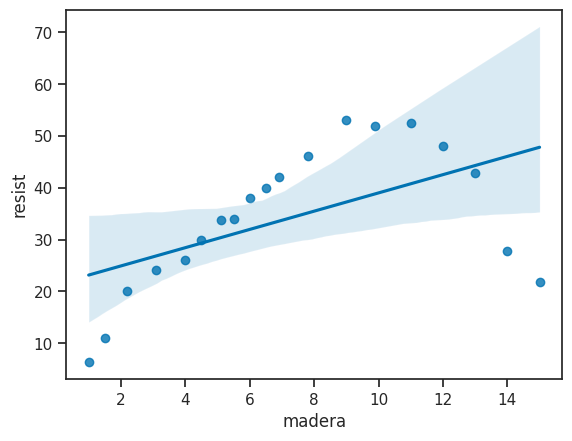

In [75]:
# Analisis grafico
%R -o coef
print(coef)
sns.regplot(data=dataM, x='madera', y='resist')
plt.show()

# plt.plot(dataM.madera, dataM.madera*coef[1]+coef[0])
# plt.ylim(0)
# sns.scatterplotw(data=dataM, x='madera', y='resist')
# plt.show()

          W      pval  normal
0  0.933893  0.204207    True


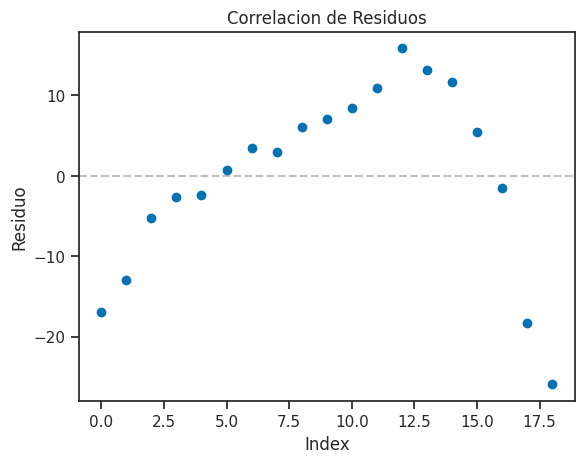

Durbin-Watson: 0.2422643504926776


In [76]:
# Analisis de Residuo

%R -o resid

# resid = pd.Series(resid, name='Residuo')
print(pg.normality(resid))
# print(st.anderson(resid))

# pg.qqplot(resid)
# %R qqPlot(resid)

# Analsis grafico a mano usando Matplotlib
plt.scatter(x=dataM.index, y=resid)
plt.xlabel( 'Index')
plt.ylabel('Residuo')
plt.title('Correlacion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()
# No se observa estructura

# Durbin-Watson Test: 2=No Correlacion (Independecia?)| 0=Correlacion Pos | 4=Correlacion Neg
print('Durbin-Watson:', sm.stats.durbin_watson(resid)) # Sin validacion Estadistica

In [77]:
# %%R

# # print(dwtest(mod_mad, alternative='two.sided', iterations=1000)) #H0 No Auto-Correlacion
# # print(outlierTest(mod_mad))
# # influenceIndexPlot(mod_mad, vars='Bonf')

# # # Influyentes - Cook
# influenceIndexPlot(mod_mad, vars='Cook')


# # # Influyentes - Leverage
# crit_leverage <- 3*mean(hatvalues(mod_mad))
# leverage <- hatvalues(mod_mad) > crit_leverage
# print(sum(leverage))
# # print(cbind(hatvalues(mod_mad), crit_leverage, leverage))


# # Influyentes - DFFITS (revisar indices en plot)
# p = length(mod_mad$coefficients)
# n = NROW(mod_mad$residuals)
# dffits_crit = 2*sqrt(p/n)
# dffits = dffits(mod_mad)
# data_dffits = data.frame(dffits=dffits)
# print(data_dffits)


In [78]:
# # Influyentes - DFBetas
# %%R

# dfbetas_crit <- 1 # Umbral estandard
# dfbetas(mod_mad)[,2]>dfbetas_crit

In [79]:
# # Exporto a Python y grafico
# %R -o data_dffits
# %R -o dffits_crit

# data_dffits.head()
# sns.scatterplot(data=data_dffits, x=data_dffits.index, y='dffits')
# plt.axhline(y=dffits_crit, linestyle='--', color='red')
# plt.axhline(y=-dffits_crit, linestyle='--', color='red')

In [80]:
# %%R

# predicted = mod_mad$fitted.values
# resid = mod_mad$resid

# library(lmtest)
# bptest(mod_mad)

In [81]:
# library(lmtest)
# dwtest(model_colest_R, alternative='two.sided', iterations=1000) #H0 No Auto-Correlacion

In [82]:
# # Homocedasticidad
# # Importo a Python
# %R -o predicted
# %R -o resid

# # Analsis grafico a mano usando Matplotlib
# plt.scatter(x=predicted, y=resid)
# plt.xlabel( 'Prediccion')
# plt.ylabel('Residuo')
# plt.title('Distribucion de Residuos')
# plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
# plt.show()
# # No se observa estructura de embudo

# # # Analitico (C Test) -> H0: Residuos Homocedasticos
# # BP, p_value, _, _ =sm.stats.het_breuschpagan(model_colest.resid, model_colest.model.exog)
# # print('Estadistico BP y p-value:', BP, p_value)

In [83]:
# Buevo modelo con Variable transformada
%%R

madera2 = dataM$madera**2
dataM2 = data.frame(dataM, madera2)

mod_mad2 = lm('resist ~ madera + madera2', data=dataM2)
print(summary(mod_mad2))


Call:
lm(formula = "resist ~ madera + madera2", data = dataM2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8124 -3.1623 -0.4507  4.0181  6.4429 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.51750    3.35526  -2.241   0.0396 *  
madera      11.95650    0.98378  12.154 1.71e-09 ***
madera2     -0.64419    0.06034 -10.676 1.10e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.288 on 16 degrees of freedom
Multiple R-squared:  0.9137,	Adjusted R-squared:  0.9029 
F-statistic: 84.73 on 2 and 16 DF,  p-value: 3.069e-09



In [84]:
%R -o dataM2

dataM2 = sm.add_constant(dataM2)
mod_mad2 = smf.ols('resist ~ madera + madera2', data=dataM2).fit()

mod_mad2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 resist   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     84.73
Date:                Fri, 23 Jun 2023   Prob (F-statistic):           3.07e-09
Time:                        03:41:03   Log-Likelihood:                -52.988
No. Observations:                  19   AIC:                             112.0
Df Residuals:                      16   BIC:                             114.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.5175      3.355     -2.241      0.040     -14.630      -0.405
madera        11.9565      0.984     12.154      0.000       9.871      14.042
madera2       -0.6442      0.060    -10.676      0.000      -0.772      -0.516
==============================================================================
Omnibus:                        7.527   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                1.831
Skew:                           0.129   Prob(JB):                        0.400
Kurtosis:                       1.501   Cond. No.                         345.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# # Wald Test -> Significatividad de cada Variable
# %%R

# # install.packages('aod')
# # library(aod)

# # # Generamos el Modelo
# # model_gorr = lm('Largo ~ Alas + Cabeza + Pata + Cuerpo', data=dataO)
# # print(summary(model_gorr))

# # # Wald Test para indentificar variables significativas
# wald.test(Sigma = vcov(mod_mad2), b = coef(mod_mad2), Terms = 1) # Cuerpo| H0: Coef = 0 (Var no significativa)



	Shapiro-Wilk normality test

data:  mod_cars$resid
W = 0.94509, p-value = 0.02152


Call:
lm(formula = "dist**0.5 ~ speed", data = dataC)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0684 -0.6983 -0.1799  0.5909  3.1534 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.27705    0.48444   2.636   0.0113 *  
speed        0.32241    0.02978  10.825 1.77e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.102 on 48 degrees of freedom
Multiple R-squared:  0.7094,	Adjusted R-squared:  0.7034 
F-statistic: 117.2 on 1 and 48 DF,  p-value: 1.773e-14


	Shapiro-Wilk normality test

data:  mod_cars2$resid
W = 0.97332, p-value = 0.3143



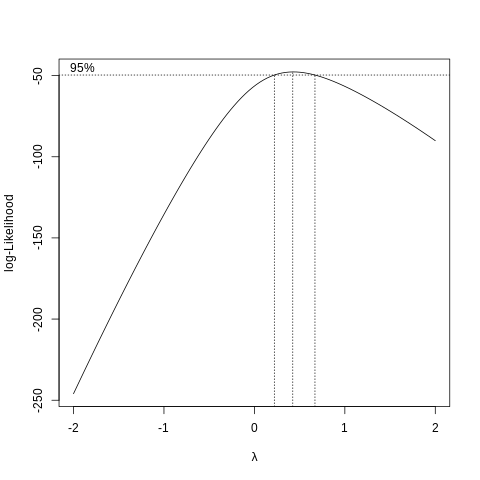

In [86]:
# Box Cox Transformation

%%R

# install.packages('MASS')
# library(MASS)

mod_cars <- lm('dist ~ speed', data=dataC)
# print(summary(mod_cars))
print(shapiro.test(mod_cars$resid))

boxcox(object = mod_cars, plotit=TRUE)

mod_cars2 <- lm('dist**0.5 ~ speed', data=dataC)
print(summary(mod_cars2))
print(shapiro.test(mod_cars2$resid))

In [ ]:
# Cuadrados Minimos Ponderados (WLS) en R
%%R

# Generamos el modelo y verificamos la Heterocedasticidad de los residuos analiticamente
ols_inspec <- lm('inspectores ~ choferes', data=dataCh)
print(bptest(ols_inspec))

# Confirmamos con el analisys grafico en Python

# Generamos la ponderacion de pesos y modelamos de nuevo
pesos = I(1/ols_onspec$fitted.values**2) # A los valores mas alejados se le reduce el peso
wls_inspec <- lm('inspectores ~ choferes', data=dataCh, weights=pesos)
print(summary(wls_inspec))